<a href="https://colab.research.google.com/github/andressaduarte/PUC---Banco-de-Dados/blob/main/Projeto_Fase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd # utilizado para a criação de dataframes, que facilitaram a visualização dos dados do csv
from datetime import datetime # utilizado para a formatação de dados de entrada
import matplotlib.pyplot as plt # utilizado para gerar o gráfico do item (d)

In [3]:
# Atribuindo o csv à variável 'arquivo'
arquivo = open("Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv","r")


In [4]:
# Criando um dataframe para acessar os nome das colunas
df_arquivo = pd.read_csv("Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv")
print(list(df_arquivo.columns))

['data', 'precip', 'maxima', 'minima', 'horas_insol', 'temp_media', 'um_relativa', 'vel_vento']


In [5]:
# Criando uma lista vazia que receberá dentro do comando 'for' as tuplas com os dados após ser realizado o split das colunas
dados_arquivo = []

for linha in arquivo:
  saida = linha.split(',')
  data = saida[0]
  precip = saida[1]
  maxima = saida[2]
  minima = saida[3]
  horas_insol = saida[4]
  temp_media = saida[5]
  um_relativa = saida[6]
  vel_vento = saida[7]
  grao = ''
  dados = (data, precip, maxima, minima, horas_insol, temp_media, um_relativa, vel_vento)
  dados_arquivo.append(dados)

print(dados_arquivo)

[('data', 'precip', 'maxima', 'minima', 'horas_insol', 'temp_media', 'um_relativa', 'vel_vento\n'), ('01/01/1961', '0', '33.8', '22.2', '11.7', '27.08', '67', '2.333333\n'), ('02/01/1961', '0', '34.7', '22.5', '9.5', '28.06', '62.5', '1.333333\n'), ('03/01/1961', '0.2', '27.7', '23.1', '2.3', '24.32', '74.25', '2\n'), ('04/01/1961', '2.4', '29.4', '20.6', '8.7', '23.56', '57.5', '2.333333\n'), ('05/01/1961', '0', '32.5', '18.8', '10.1', '25.22', '63.5', '3.666667\n'), ('06/01/1961', '3.8', '26.2', '21.9', '0.4', '23.06', '80.75', '2.666667\n'), ('07/01/1961', '1.6', '27.8', '15.2', '11.7', '21.34', '57.25', '1.666667\n'), ('08/01/1961', '0', '33.1', '16.4', '12', '23.86', '62', '1.333333\n'), ('09/01/1961', '0', '35.7', '20.6', '12.2', '27.2', '61.25', '1.666667\n'), ('10/01/1961', '26.9', '26.7', '20.7', '2.7', '22.84', '88.25', '2.666667\n'), ('11/01/1961', '9.7', '28', '19.9', '12.1', '23.08', '64.25', '2\n'), ('12/01/1961', '0', '32.6', '19.6', '12.2', '25.4', '70.75', '2\n'), ('13

In [6]:
# Obtendo informações sobre a completude do dataset
df_arquivo.head()
df_arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18563 entries, 0 to 18562
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data         18563 non-null  object 
 1   precip       18563 non-null  float64
 2   maxima       18563 non-null  float64
 3   minima       18563 non-null  float64
 4   horas_insol  18563 non-null  float64
 5   temp_media   18563 non-null  float64
 6   um_relativa  18563 non-null  float64
 7   vel_vento    18563 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [8]:
# criando as colunas mes e ano no dataframe
df_arquivo["data"] = pd.to_datetime(df_arquivo["data"])
df_arquivo["ano"] = df_arquivo["data"].dt.strftime('%Y')
df_arquivo["mes"] = df_arquivo["data"].dt.strftime('%m')
df_arquivo["mes_ano"] = (df_arquivo["mes"] + "/" + df_arquivo["ano"])
df_arquivo

<ipython-input-8-ae35c68cd55a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_arquivo["data"] = pd.to_datetime(df_arquivo["data"])


,data,precip,maxima,minima,horas_insol,temp_media,um_relativa,vel_vento,ano,mes,mes_ano
0,1961-01-01,0.0,33.8,22.2,11.7,27.08,67.00,2.333333,1961,01,01/1961
1,1961-02-01,0.0,34.7,22.5,9.5,28.06,62.50,1.333333,1961,02,02/1961
2,1961-03-01,0.2,27.7,23.1,2.3,24.32,74.25,2.000000,1961,03,03/1961
3,1961-04-01,2.4,29.4,20.6,8.7,23.56,57.50,2.333333,1961,04,04/1961
4,1961-05-01,0.0,32.5,18.8,10.1,25.22,63.50,3.666667,1961,05,05/1961
...,...,...,...,...,...,...,...,...,...,...,...
18558,2016-06-07,21.8,23.3,13.6,1.7,14.96,73.25,4.801440,2016,06,06/2016
18559,2016-07-07,0.0,18.4,9.8,7.6,12.96,73.25,2.915160,2016,07,07/2016
18560,2016-08-07,0.0,19.4,7.6,6.3,12.64,76.25,1.200360,2016,08,08/2016
18561,2016-09-07,0.0,14.2,11.7,0.0,12.66,94.25,1.371840,2016,09,09/2016


### Iniciando a resolução das questões


In [104]:
# criando as variaveis que receberao os dados de entrada do usuário após a validação
mes_inicial = 0
mes_final = 0
ano_inicial = 0
ano_final = 0

# criando as variáveis que receberão os calculos das análises de dados
mes_mais_chuvoso = ''
maior_precipitacao = 0
avg_temp_minima = 0


# Validação de entrada do usuário:
# data_inicial = 0
# data_final = 0
# data_inicial_u = 0
# data_final_u = 0

def validacao(data_inicial,data_final,data_inicial_u,data_final_u):

  mes_inicial_u = int(input("Digite o mes inicial (de 1 a 12): "))
  while mes_inicial_u < 1 or mes_inicial_u > 12:
      mes_inicial_u = int(input("Mes inválido, digite um mes dentro do intervalo de 1 a 12: "))
  mes_inicial = mes_inicial_u

  ano_inicial_u = int(input("Digite o ano inicial (de 2006 a 2016): "))
  while ano_inicial_u < 2006 or ano_inicial_u > 2016:
      ano_inicial_u = int(input("Ano inválido, digite um ano dentro do intervalo de 2006 a 2016: "))
  ano_inicial = ano_inicial_u

  mes_final_u = int(input("Digite o mes final (de 1 a 12): "))
  while mes_final_u < 1 or mes_final_u > 12:
      mes_final_u = int(input("Mes inválido, digite um mes dentro do intervalo de 1 a 12: "))
  mes_final = mes_final_u

  ano_final_u = int(input("Digite o ano final (de 2006 a 2016): "))
  while ano_final_u < 2006 or ano_final_u > 2016:
      ano_final_u = int(input("Ano inválido, digite um ano dentro do intervalo de 2006 a 2016: "))
  ano_final = ano_final_u

  data_inicial_u = pd.to_datetime(str(ano_inicial) + '-' + str(mes_inicial), format='%Y-%m')
  data_final_u = pd.to_datetime(str(ano_final) + '-' + str(mes_final), format='%Y-%m')
  data_inicial = data_inicial_u.strftime("%m/%Y")
  data_final = data_final_u.strftime("%m/%Y")

  if ano_final == ano_inicial:
    if mes_final < mes_inicial:
      print("Datas inválidas, a data final precisa ser posterior à data inicial. Digite novamente.")
      validacao(0,0,0,0)
  elif ano_final < ano_inicial:
    print("Datas inválidas, a data final precisa ser posterior à data inicial. Digite novamente.")
    validacao(0,0,0,0)
  else:
    print(f" Os meses informados foram: \n Data Inicial: {data_inicial} \n Data Final: {data_final}")

  return (data_inicial,data_final)


retorno = validacao(0,0,0,0)
data_inicial = retorno[0]
data_final = retorno[1]

Digite o mes inicial (de 1 a 12): 1
Digite o ano inicial (de 2006 a 2016): 2008
Digite o mes final (de 1 a 12): 2
Digite o ano final (de 2006 a 2016): 2009
 Os meses informados foram: 
 Data Inicial: 01/2008 
 Data Final: 02/2009
01/2008 02/2009


In [95]:
# Criando a variável 'grao'que recebe o input do usuário sobre qual tipo de visualização quer ter dos dados.
grao_u = int(input("Informe o número da opção que quer ver: \n 1 - Todos os dados \n 2 - Apenas os dados de precipitação \n 3 - Apenas os dados de temperatura \n 4 - Apenas os dados de umidade e vento \n "))
while grao_u < 1 or grao_u > 4:
  grao_u = int(input("Por favor, digite uma opção de 1 a 4, conforme as opções a seguir: \n 1 - Todos os dados \n 2 - Apenas os dados de precipitação \n 3 - Apenas os dados de temperatura \n 4 - Apenas os dados de umidade e vento \n"))
grao = grao_u


Informe o número da opção que quer ver: 
 1 - Todos os dados 
 2 - Apenas os dados de precipitação 
 3 - Apenas os dados de temperatura 
 4 - Apenas os dados de umidade e vento 
 4


In [70]:
print(ano_inicial)

0


In [96]:
# a) Visualização de intervalo de dados em modo texto:
if grao == 1:
  display(df_arquivo)
  actual_file = (df_arquivo.iloc[:,:8])
if grao == 2:
  df_precipitacao = df_arquivo[(df_arquivo['mes_ano'] >= data_inicial) & (df_arquivo['mes_ano'] <= data_final)][['data', 'mes_ano', 'precip']]
  display(df_precipitacao)
  actual_file = df_precipitacao
if grao == 3:
  df_temperatura = df_arquivo[(df_arquivo['mes_ano'] >= data_inicial) & (df_arquivo['mes_ano'] <= data_final)][['data', 'mes_ano', 'maxima', 'minima', 'temp_media']]
  display(df_temperatura)
  actual_file = df_temperatura
if grao == 4:
  df_umidade = df_arquivo[(df_arquivo['mes_ano'] >= data_inicial) & (df_arquivo['mes_ano'] <= data_final)][['data', 'mes_ano', 'um_relativa', 'vel_vento']]
  display(df_umidade)
  actual_file = df_umidade



,data,mes_ano,um_relativa,vel_vento
1,1961-02-01,02/1961,62.50,1.333333
2,1961-03-01,03/1961,74.25,2.000000
32,1961-02-02,02/1961,73.00,3.000000
33,1961-03-02,03/1961,71.75,2.333333
43,1961-02-13,02/1961,65.25,2.666667
...,...,...,...,...
18493,2016-02-05,02/2016,81.00,1.300000
18523,2016-01-06,01/2016,80.00,1.700000
18524,2016-02-06,02/2016,76.50,2.066667
18553,2016-01-07,01/2016,83.50,1.371840


In [97]:
# b) Mês mais chuvoso:

# criando dataframe com a precipitacao maxima por mes_ano e transformando em lista
df_precip_mensal = df_arquivo.groupby(["mes_ano"])["precip"].max()
df_precip = pd.DataFrame({'mes_ano': df_precip_mensal.index, 'precip': df_precip_mensal.values})
precip_mensal = df_precip.values.tolist()

# atribuindo a saida da lista às variaveis mes_precip e precip
for mes in precip_mensal:
  saida = mes[:]
  mes_precip = saida[0]
  precip = saida[1]

# aplicando a lógica para identificar qual a maior precipitacao maxima e mes_ano correspondente
  if precip > maior_precipitacao:
    maior_precipitacao = precip
    mes_mais_chuvoso = mes_precip
print(f"Maior precipitação: {maior_precipitacao} Mes: {mes_mais_chuvoso}")

Maior precipitação: 149.6 Mes: 03/2008


In [98]:
# c) Média da temperatura mínima de um determinado mês (auge do inverno) nos últimos 11 anos (2006 a 2016):

# criando dataframe para calcular a média de temperaturas mínima por mes_ano e atribuindo a uma lista de dicionarios
df_avg_min_temp = df_arquivo.groupby(["mes_ano"])["minima"].mean()
df_avg_min = pd.DataFrame({'mes_ano': df_avg_min_temp.index, 'minima': df_avg_min_temp.values})
avg_min_temp_u = df_avg_min.to_dict('records')
avg_min_temp = (avg_min_temp_u)
avg_min_temp


[{'mes_ano': '01/1961', 'minima': 19.593548387096774},
 {'mes_ano': '01/1962', 'minima': 18.041935483870965},
 {'mes_ano': '01/1963', 'minima': 19.432258064516127},
 {'mes_ano': '01/1964', 'minima': 17.958064516129035},
 {'mes_ano': '01/1965', 'minima': 19.661290322580644},
 {'mes_ano': '01/1966', 'minima': 19.364516129032257},
 {'mes_ano': '01/1967', 'minima': 19.13},
 {'mes_ano': '01/1968', 'minima': 18.5258064516129},
 {'mes_ano': '01/1969', 'minima': 18.096774193548388},
 {'mes_ano': '01/1970', 'minima': 19.048387096774192},
 {'mes_ano': '01/1971', 'minima': 19.638709677419353},
 {'mes_ano': '01/1972', 'minima': 18.76774193548387},
 {'mes_ano': '01/1973', 'minima': 19.783870967741933},
 {'mes_ano': '01/1974', 'minima': 18.53548387096774},
 {'mes_ano': '01/1975', 'minima': 17.570967741935487},
 {'mes_ano': '01/1976', 'minima': 18.18064516129032},
 {'mes_ano': '01/1977', 'minima': 19.45483870967742},
 {'mes_ano': '01/1978', 'minima': 18.787096774193547},
 {'mes_ano': '01/1979', 'mini

In [99]:
# criando a variavel 'mes_ano_inverno' para receber a entrada do usuario de qual mes auge do inverno é necessario calcular a média da temperatura mínima mensal ao longo dos anos
mes_ano_inverno = []
mes_inverno_u = int(input("Digite o mes auge do inverno: "))
while mes_inverno_u < 1 or mes_inverno_u > 12:
    mes_inverno_u = int(input("Mes inválido, digite um mes dentro do intervalo de 1 a 12: "))
mes_inverno = str(mes_inverno_u)

for ano in range(2006,2017):
  mes_ano_inverno_u = pd.to_datetime(str(ano) + '/' + (mes_inverno), format='%Y-%m')
  mes_ano_inverno_l = mes_ano_inverno_u.strftime("%m/%Y")
  # mes_ano_l = mes_ano_inverno
  mes_ano_inverno.append(mes_ano_inverno_l.replace("'",""))

print(mes_ano_inverno)


Digite o mes auge do inverno: 66
Mes inválido, digite um mes dentro do intervalo de 1 a 12: 6
['06/2006', '06/2007', '06/2008', '06/2009', '06/2010', '06/2011', '06/2012', '06/2013', '06/2014', '06/2015', '06/2016']


In [100]:
# criando dicionario com os meses de cada ano e médias de temperatura minima referentes ao mes do input do usuário
media_minima = {}
for mes in avg_min_temp:

  if mes.get("mes_ano") in mes_ano_inverno:
    mes_ano = mes.get("mes_ano")
    minima = mes.get("minima")
    media_minima[mes_ano] = minima
    # print(f"Mes e ano: {mes_ano} | Temperatura mínima média: {minima}")
print(media_minima)

{'06/2006': 13.313333333333333, '06/2007': 13.916666666666666, '06/2008': 11.54, '06/2009': 12.693333333333333, '06/2010': 13.07, '06/2011': 12.636666666666667, '06/2012': 14.336666666666668, '06/2013': 13.273333333333333, '06/2014': 14.46, '06/2015': 12.56, '06/2016': 11.524000000000001}


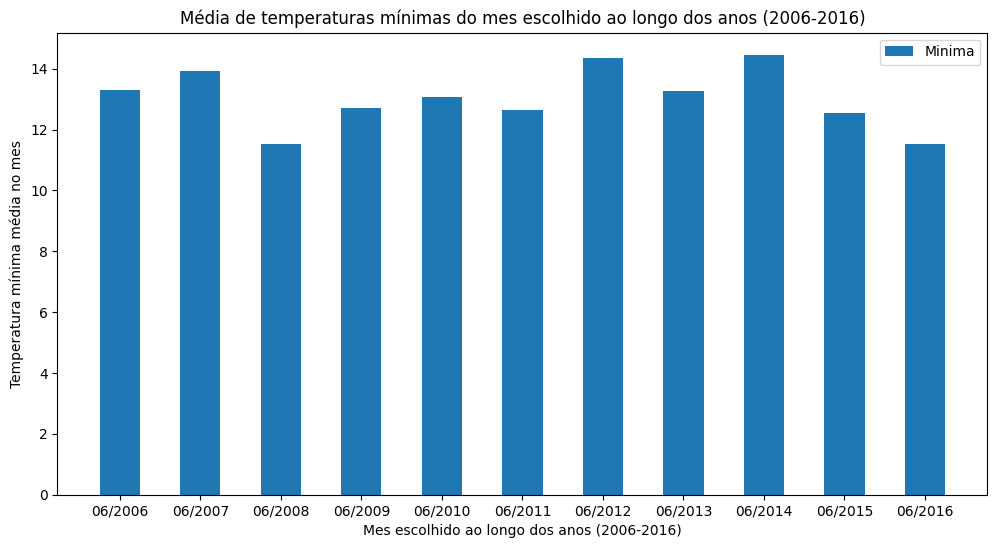

In [101]:
# d) Gráfico de barras (vertical ou horizontal) com as médias de temperatura mínima de um determinado mês nos últimos 11 anos.
plt.figure(figsize=(12,6))
plt.bar(media_minima.keys(), media_minima.values(), width = 0.5, label= 'Minima')
plt.xlabel("Mes escolhido ao longo dos anos (2006-2016)")
plt.ylabel("Temperatura mínima média no mes")
plt.title("Média de temperaturas mínimas do mes escolhido ao longo dos anos (2006-2016)")
plt.legend()
plt.show()



In [102]:
# e) Média geral da temperatura mínima de um determinado mês nos últimos 11 anos (2006 a 2016):
media_geral = sum(media_minima.values())/len(media_minima)
print(f"A média de temperatura no mes {mes_inverno} nos ultimos {len(media_minima)} anos foi de {round(media_geral,1)} graus.")


A média de temperatura no mes 6 nos ultimos 11 anos foi de 13.0 graus.
